### Learning About Data Analysis

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
from pingouin import kruskal
%matplotlib inline 
import scikit_posthocs as sp

In [2]:
#Table of dataset
df = pd.read_csv("collaboration_survey_may_14__2020_15.24.csv", header = 1)
df = df.drop(0)
print(df.shape)
df.head()

(133, 47)


,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,I am concerned about how I could be represented by the data.,"If you have any comments about how this data might be used, please provide them here",I find that the device invades my privacy if used during classes.,"Compared to a Google Home or Amazon Echo, this device seems more invasive or intrusive.",I'd rather not have a piece of technology actively recording me in class.,"I would prefer to have a device that offers more interactivity (i.e., answering questions, providing a visualization for the students).","If yes, what types of interactivity would improve your experience with these pods?",I would be okay with having a camera on top of the respeaker capturing video or image data.,"If you have any other comments with regards to the respeaker, please provide them here.","Would you like to proceed? If so, you will be rerouted to a different page to provide your information (this is for BOTH the $5 participation and $50 raffle prize)."
1,5/4/2020 12:52,5/4/2020 13:10,0,65.79.155.148,100,1048,1,5/4/2020 13:10,R_RPNEtGyqWSTBnFv,NaN,...,4,What if the way I collaborate is seen as bad b...,3,2,4,1,flow of conversation or key points.,2,NaN,1
2,5/4/2020 12:53,5/4/2020 13:10,0,67.175.157.69,100,1046,1,5/4/2020 13:10,R_2SiQ8F184WK86Jb,NaN,...,5,How “active” a participant is,4,4,4,1,Visualization of ideas or questions,2,NaN,2
3,5/4/2020 12:53,5/4/2020 13:14,0,216.80.117.12,100,1282,1,5/4/2020 13:14,R_ZmLOpWUzKvobPup,NaN,...,2,NaN,2,3,3,1,NaN,1,NaN,1
4,5/4/2020 12:47,5/4/2020 13:14,0,165.124.162.61,100,1613,1,5/4/2020 13:14,R_3LcGmM9e2w9aa9p,NaN,...,3,NaN,2,3,1,1,Not sure. Something activity and interesting.,1,NaN,1
5,5/4/2020 12:46,5/4/2020 13:50,0,142.196.131.148,100,3819,1,5/4/2020 13:50,R_R9bjwtY5KtzJgVX,NaN,...,3,NaN,2,2,2,1,being able to see when questions were asked an...,2,NaN,1


In [3]:
Q_20 = 'I understand how this information might be useful for supporting learning.'
Q_21 = 'I am concerned about how I could be represented by the data.'
Q_22 = 'If you have any comments about how this data might be used, please provide them here'
Q_23 = 'I find that the device invades my privacy if used during classes.'
Q_24 = 'Compared to a Google Home or Amazon Echo, this device seems more invasive or intrusive.'
Q_25 = "I'd rather not have a piece of technology actively recording me in class."
Q_27 = 'I would prefer to have a device that offers more interactivity (i.e., answering questions, providing a visualization for the students).'

In [4]:
#list of column names
df.columns


Index(['Start Date', 'End Date', 'Response Type', 'IP Address', 'Progress',
       'Duration (in seconds)', 'Finished', 'Recorded Date', 'Response ID',
       'Recipient Last Name', 'Recipient First Name', 'Recipient Email',
       'External Data Reference', 'Location Latitude', 'Location Longitude',
       'Distribution Channel', 'User Language',
       'Please indicate your current degree status',
       'Are you a student at Northwestern University?',
       'What is your current year in school?',
       'How often do you collaborate on classwork in school settings (inside of classrooms, for class)? - Selected Choice',
       'How often do you collaborate on classwork in school settings (inside of classrooms, for class)? - Other (please specify): - Text',
       'How often do you collaborate on classwork outside of school settings (work done outside of classroom, etc)? - Selected Choice',
       'How often do you collaborate on classwork outside of school settings (work done outside

In [5]:
#number of rows
len(df)

133

In [6]:
#making the table a new table of questions I want
df = df.iloc[:,36:43]
df

,I understand how this information might be useful for supporting learning.,I am concerned about how I could be represented by the data.,"If you have any comments about how this data might be used, please provide them here",I find that the device invades my privacy if used during classes.,"Compared to a Google Home or Amazon Echo, this device seems more invasive or intrusive.",I'd rather not have a piece of technology actively recording me in class.,"I would prefer to have a device that offers more interactivity (i.e., answering questions, providing a visualization for the students)."
1,3,4,What if the way I collaborate is seen as bad b...,3,2,4,1
2,4,5,How “active” a participant is,4,4,4,1
3,4,2,NaN,2,3,3,1
4,3,3,NaN,2,3,1,1
5,4,3,NaN,2,2,2,1
...,...,...,...,...,...,...,...
129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sorting Q_20 from low to high
df = df.sort_values(Q_20)
df.head(60)

,I understand how this information might be useful for supporting learning.,I am concerned about how I could be represented by the data.,"If you have any comments about how this data might be used, please provide them here",I find that the device invades my privacy if used during classes.,"Compared to a Google Home or Amazon Echo, this device seems more invasive or intrusive.",I'd rather not have a piece of technology actively recording me in class.,"I would prefer to have a device that offers more interactivity (i.e., answering questions, providing a visualization for the students)."
63,2,5,NaN,5,2,5,1
46,2,4,People might feel conscious during discussions...,4,3,4,1
12,2,4,This is pretty creepy (and I'm a CS major) in ...,5,4,5,2
1,3,4,What if the way I collaborate is seen as bad b...,3,2,4,1
69,3,2,NaN,3,3,3,2
65,3,4,NaN,4,3,3,2
62,3,2,NaN,2,4,2,1
55,3,2,none,3,2,4,2
49,3,1,NaN,2,1,4,2
48,3,4,NaN,3,2,3,2


In [8]:
#Separating the df into answers for 'I understand how this information might be useful for supporting learning.'
df_2 = df[(df[Q_20] == '2')]

df_3 = df[(df[Q_20] == '3')]

df_4 = df[(df[Q_20] == '4')]

df_5 = df[(df[Q_20] == '5')]




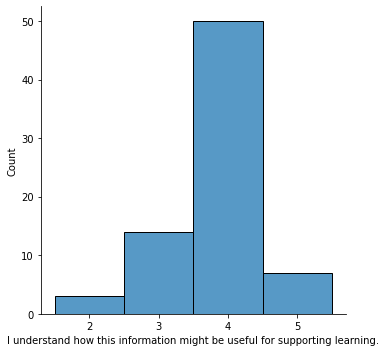

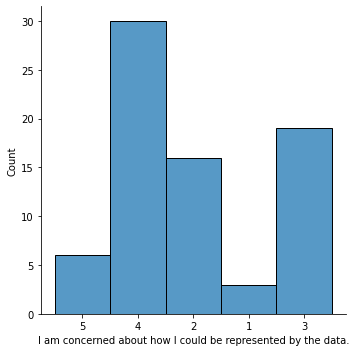

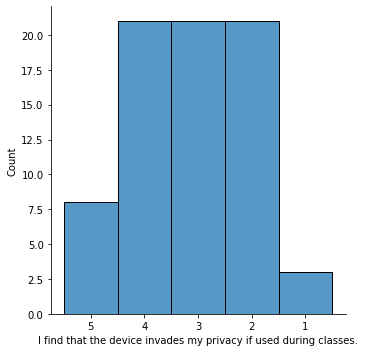

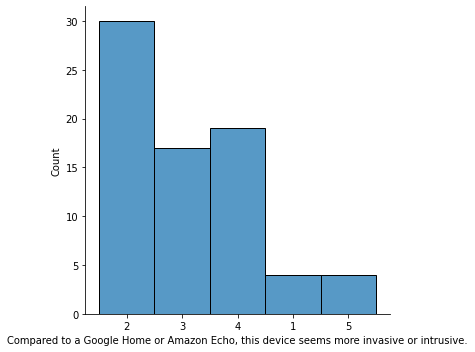

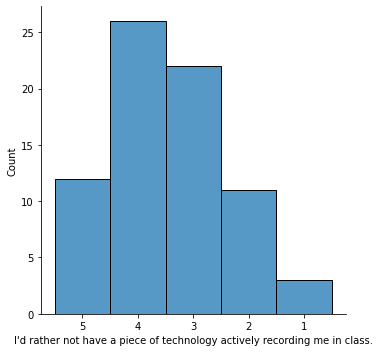

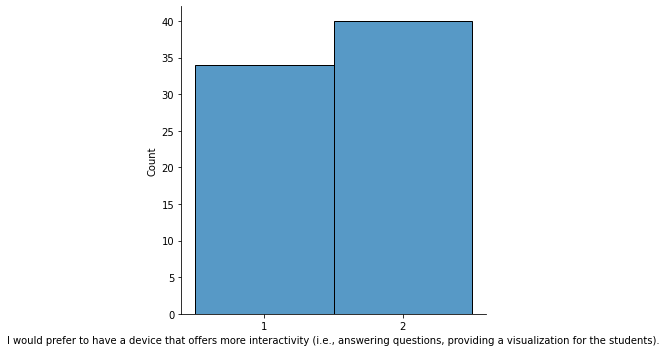

In [9]:
#testing normal distribution

# Q_20
sns.displot(data = df, 
            x = Q_20,  
           kind = 'hist')
#Q_21
sns.displot(data = df, 
           x = Q_21)
#Q_23
sns.displot(data = df, 
           x = Q_23)
#Q_24
sns.displot(data = df, 
           x = Q_24)
#Q_25
sns.displot(data = df, 
           x = Q_25)
#Q27
sns.displot(data = df, 
           x = Q_27)


In [10]:
#Implimenting chi-square test on Q_20 and Q_23
    #Null Hypothesis(H1): There was no indication that participants who answered lowly on Q_20 answered high on Q_23
    #Alternate Hypotheses(H1): On average, articipants who answered lower on Q_20 answered higher on Q_23
    


In [11]:
#trying chi-square using contingency

contingency_1 = pd.crosstab(df[Q_20], df[Q_23])
contingency_1



I find that the device invades my privacy if used during classes.,1,2,3,4,5
I understand how this information might be useful for supporting learning.,,,,,
2,0,0,0,1,2
3,0,5,6,2,1
4,2,13,15,17,3
5,1,3,0,1,2


In [12]:
#percent form
contingency_percent = pd.crosstab(df[Q_20], df[Q_23], normalize = 'index')
contingency_percent

I find that the device invades my privacy if used during classes.,1,2,3,4,5
I understand how this information might be useful for supporting learning.,,,,,
2,0.000000,0.000000,0.000000,0.333333,0.666667
3,0.000000,0.357143,0.428571,0.142857,0.071429
4,0.040000,0.260000,0.300000,0.340000,0.060000
5,0.142857,0.428571,0.000000,0.142857,0.285714


<AxesSubplot:xlabel='I find that the device invades my privacy if used during classes.', ylabel='I understand how this information might be useful for supporting learning.'>

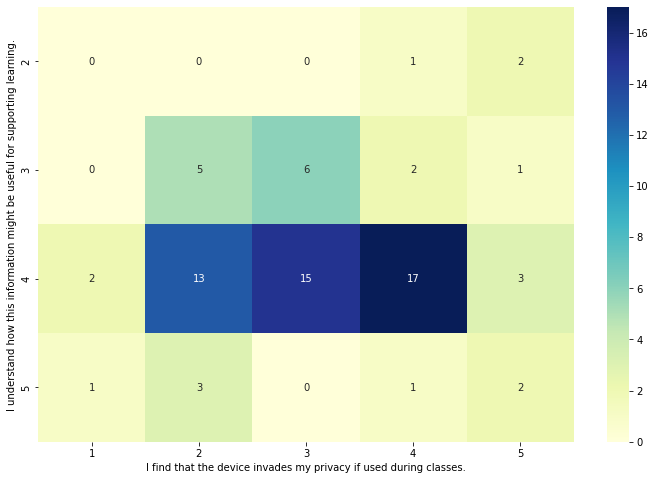

In [13]:
#heat map
plt.figure(figsize=(12,8))
sns.heatmap(contingency_1, annot=True, cmap="YlGnBu")

In [14]:
c, p, dof, expected = chi2_contingency(contingency_1)
print('The chi_2 test statistic is: ', c)
print('The p-value is:', p)
print('The degree of freedom is: ', dof)
print('The expected value is: ', expected)

The chi_2 test statistic is:  22.14630385487529
The p-value is: 0.03591243889493906
The degree of freedom is:  12
The expected value is:  [[ 0.12162162  0.85135135  0.85135135  0.85135135  0.32432432]
 [ 0.56756757  3.97297297  3.97297297  3.97297297  1.51351351]
 [ 2.02702703 14.18918919 14.18918919 14.18918919  5.40540541]
 [ 0.28378378  1.98648649  1.98648649  1.98648649  0.75675676]]


In [15]:
#Results
significance_level = 0.05
print("p value: " , str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value:  0.03591243889493906
Reject NULL HYPOTHESIS


<AxesSubplot:xlabel='I am concerned about how I could be represented by the data.', ylabel='I understand how this information might be useful for supporting learning.'>

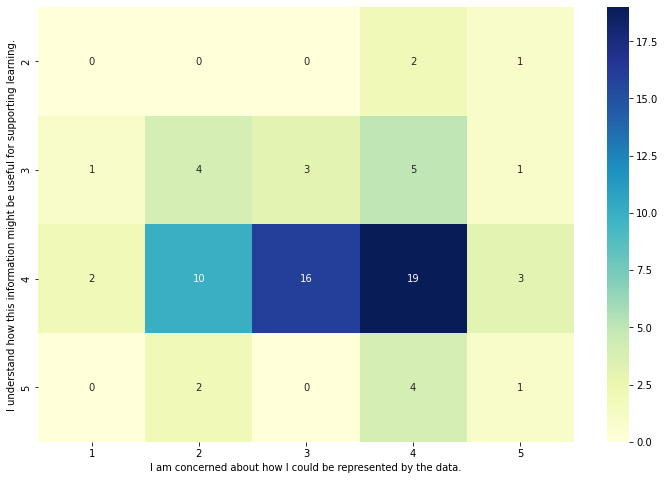

In [16]:
#Heat map on Q_20 and Q_21

contingency_2 = pd.crosstab(df[Q_20], df[Q_21])
plt.figure(figsize=(12,8))
sns.heatmap(contingency_2, annot=True, cmap="YlGnBu")

In [17]:
c, p, dof, expected = chi2_contingency(contingency_2)
print('The chi_2 test statistic is: ', c)
print('The p-value is:', p)
print('The degree of freedom is: ', dof)
print('The expected value is: ', expected)

The chi_2 test statistic is:  9.47366917293233
The p-value is: 0.6620283341982087
The degree of freedom is:  12
The expected value is:  [[ 0.12162162  0.64864865  0.77027027  1.21621622  0.24324324]
 [ 0.56756757  3.02702703  3.59459459  5.67567568  1.13513514]
 [ 2.02702703 10.81081081 12.83783784 20.27027027  4.05405405]
 [ 0.28378378  1.51351351  1.7972973   2.83783784  0.56756757]]


In [18]:
#Results
significance_level = 0.05
print("p value: " + str(p)) 
if p <= significance_level: 
    print('Reject NULL HYPOTHESIS') 
else: 
    print('ACCEPT NULL HYPOTHESIS')

p value: 0.6620283341982087
ACCEPT NULL HYPOTHESIS


<AxesSubplot:xlabel='I am concerned about how I could be represented by the data.', ylabel='I find that the device invades my privacy if used during classes.'>

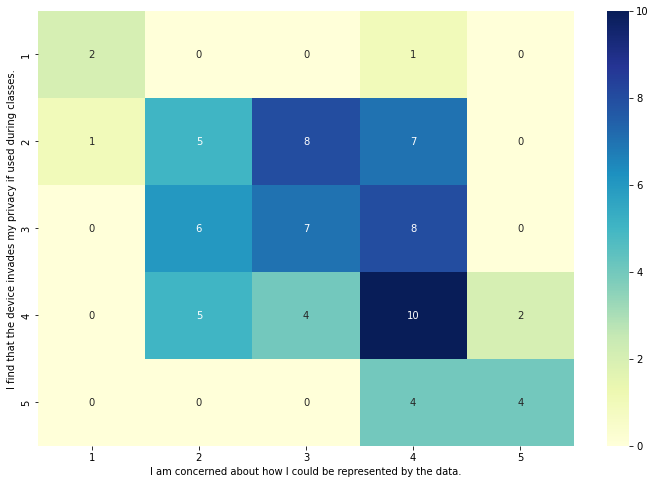

In [19]:
contingency_3 = pd.crosstab(df[Q_23], df[Q_21])
plt.figure(figsize=(12,8))
sns.heatmap(contingency_3, annot=True, cmap="YlGnBu")

In [20]:
#Trying the Kruskal-Wallis test. 
#**try the post-hoc test also.
ord1 = df[Q_20]
ord2 = df[Q_21]
pd.crosstab(ord1, ord2)

I am concerned about how I could be represented by the data.,1,2,3,4,5
I understand how this information might be useful for supporting learning.,,,,,
2,0,0,0,2,1
3,1,4,3,5,1
4,2,10,16,19,3
5,0,2,0,4,1


In [21]:
ord1.unique()

array(['2', '3', '4', '5', nan], dtype=object)

In [22]:
replacements = {'2':2, '3':3, '4':4, '5':5}
df['Q_20_redone'] = df[Q_20].replace(replacements)
ord1 = df['Q_20_redone']
ord1.value_counts()

4.0    50
3.0    14
5.0     7
2.0     3
Name: Q_20_redone, dtype: int64

In [23]:
kruskal(data = df, dv = 'Q_20_redone', between = Q_21)

,Source,ddof1,H,p-unc
Kruskal,I am concerned about how I could be represente...,4,0.479707,0.975446
